<a href="https://colab.research.google.com/github/momoh127/EC414-MachineLearningWork/blob/main/EC414_HW8_Fall2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1: Forward and Backpropogation **(15 pts)**

**Due date**: Wednesday, November 27th, by 11:59pm

a. Consider a simple neural network with an input layer, a hidden layer, and an output layer. The weights and biases for the network are the following.

* Weights from input to hidden layer $W^1 = \begin{pmatrix} 0.25 & -0.30 \\ 0.50 & 0.70 \end{pmatrix}$
* Bias from input to hidden layer $b^1 = \begin{pmatrix} 0 \\ -0.2 \end{pmatrix}$
* Weights from hidden layer to output layer $W^2 = \begin{pmatrix} 0.40 & -0.45 \end{pmatrix}$
* Bias from hidden layer to output layer $b^2 = 0.1$

We will use the sigmoid activations for both layers $\sigma(x) = \frac{1}{1 + e^{-x}}$.

Compute the forward pass of this neural network when the input $a^0 = \begin{pmatrix} 20 \\ 40 \end{pmatrix}$. **Show your work (10 pts)**

**[SOLUTION]**



b. Now we will backproporgate through the following diagram. Please find $\frac{\partial O}{\partial w_0}, \frac{\partial O}{\partial x_0}, and \frac{\partial O}{\partial w_1}, \frac{\partial O}{\partial x_1}, and \frac{\partial O}{\partial w_2}$. Don't forget to **show your work (15 pts)**

**NOTE:** Use the intermediate functions (a through g) to perform step-by-step backpropogation.

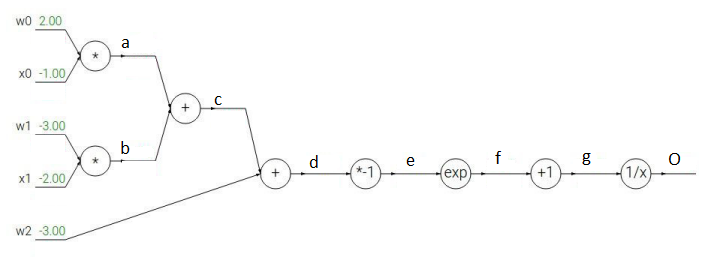

**[SOLUTION]**

## Problem 2: Neural Networks Using NumPy **(85 points total)**

In this section, you will implement and train an Artificial Neural Network (ANN) from scratch. The model will be trained on **MNIST** dataset. MNIST is an image dataset containing handwritten digits from 0 to 9. The shape of each image is (28, 28). The aim of the model is to recognize the handwritten digit in the image.

**NOTE:** All libraries required have been imported below. You do not need to import any other libraries/modules for implementation.

Please read the following code and text, which will collect and preprocess the data. The description of your tasks will follow after.

In [ ]:
# Importing Libraries

import numpy as np
import tqdm
import random
import sys
from keras.datasets import mnist
from  sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

We will use the [mnist](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) documentation, to load the MNIST dataset. The variable names are as given below:

1. x_train: Train Input
2. y_train: Train Labels
3. x_test: Test Input
4. y_test: Test Labels

Then, we split the training data into training and validation data to evaluate the model during each training epoch.  Before split, the training data has 60000 data points. After the split, ensure training and validation data have 50000 and 10000 points respeectively. The variable names for the validation data are as given below:
1. x_valid: Valid Input
2. y_valid: Valid Labels

After execution, your train, validation, and test data will have 50000, 10000, and 10000 data points each.

In [ ]:
# Data Preprocessing
# DO NOT CHANGE ANYTHING BELOW

# Load the MNIST Dataset with variable names as given above
(x_train, y_train), (x_test, y_test) = mnist.load_data()

orig_train = x_train

# Normalize the pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Flatten the images into 1D arrays
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Convert the class labels into one-hot encoded vectors
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# Split the train data into training and validation data
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.16666, random_state=42)


# Print the shapes of the data arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_valid shape:', x_valid.shape)
print('y_valid shape:', y_valid.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (50000, 784)
y_train shape: (50000, 10)
x_valid shape: (10000, 784)
y_valid shape: (10000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)


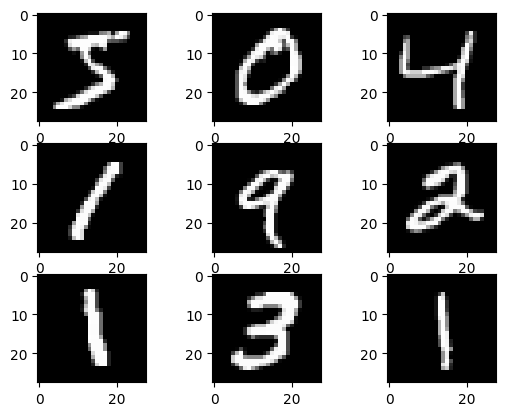

In [ ]:
# DO NOT CHANGE
# Plot the first 9 images in the dataset
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(orig_train[i], cmap=plt.get_cmap('gray'))
  `plt.show()

## Implementing the MLP **(70 pts)**
Finish the implementation of the multilayer perceptron class `MLP` below. This class implements a three-layer perceptrion.

The input should have shape `[B,784]`, where `B` is a batch size.

The first hidden layer `a1` has 256 neurons.
The second hidden layer `a2` has 128 neurons.
The output layer `a3` has 10 neurons.

So, the output of the network with input shape `[B,784]` should have shape `[B,10]`.

The weight matrices are stored in `self.W1`, `self.W2`, and `self.W3`.

The activation function for layers 1 and 2 is the `ReLU` function `ReLU(z) =max(0,z)`.
The last layer uses a different activation function, the sigmoid function, with `sigmoid(z)=1/(1+exp(-z))`. Thus, `a3` should be a vector all of whose coordinates are between 0 and 1.

The loss function is the squared loss. You will be comparing `a3` (which has size 10 for each example image) to the 1-hot vector containing all zeros except for a single 1 in the coordinate identifying the class of the image. So the loss for a single example (i.e. batch size 1) will be `0.5 * (a3 -y)**2`


You need to implement the following functions. See the relevant docstrings for more description of what they must do:

* ReLU
* dReLU
* sigmoid
* dsigmoid
* forward
* backprop
* apply_sgd

Technically, you may still pass the tests if you do not implement `dReLU` and `dsigmoid`, so it is ok if you do not. However, it would be easier if you do implement them and use them in your implementation of `backprop`.




In [ ]:
class MLP:
    def __init__(self, batch = 64, lr = 1e-2, epochs = 50):

        '''

        Initialization Function

        '''
        # DO NOT CHANGE
        self.batch = batch
        self.epochs = epochs
        self.lr = lr

        self.loss = []
        self.acc = []

        # Add here any other variable intitalization you want (if any - you do not need to modify this function

        # END

        # DO NOT CHANGE
        self.init_weights()

    def init_weights(self):

        '''

        This function initializes the weights for the neural network

        '''

        # We initialize the weights with appropriate dimensions (based on the input and output dimension) using np.random() function
        # There should be 256 neurons in the first hidden layer, and 128 neurons in the second hidden layer
        # The scalings are magical constants that produce "He initialization". You can google "Xavier He initialization" to learn more about different initialization schemes.
        # These scalings make SGD work better, and also help avoid numerical overflow issues in the final sigmoid activation.

        self.W1 = np.random.randn(784, 256) / (0.5 * np.sqrt(784))
        self.W2 = np.random.randn(256, 128) / (0.5 * np.sqrt(256))
        self.W3 = np.random.randn(128, 10)  / np.sqrt(128)

    def ReLU(self, z):

        '''

        Computes the Rectified Linear Unit (ReLU) activation on the given input and returns the output.
        The ReLU activation function sets all negative values in the input to 0, and leaves all non-negative values unchanged.

        arguments:
        z: The input to the ReLU activation function.

        returns:
        The output of the ReLU activation function, which is the element-wise maximum of 0 and the input. Should have the same shape as z
        ReLU(z) = max(0, z)

        '''
        # WRITE CODE HERE
        # Compute ReLU activation on the given input and return the output
        return np.maximum(0, z)


    def dReLU(self, z):

        '''

        Computes the derivative of the Rectified Linear Unit (ReLU) activation on the given input and returns the output.
        The derivative of the ReLU activation function is 1 for all non-negative input values, and 0 for all negative input values.

        arguments:
        z: The input to the dReLU function.

        returns:
        The output of the dReLU function, which is the element-wise derivative of the ReLU activation function. Should have the same shape as z
        ReLU(z) = max(0, z)

        '''

        # WRITE CODE HERE
        # Compute the derivative of ReLU activation on the given input and return the output
        # Ignore any points of non-differentiability.
        return (z > 0).astype(float)


    def sigmoid(self, z):

        '''

        Computes the Sigmoid activation on the given input and returns the output.

        arguments:
        z: The input to the Sigmoid function

        returns:
        The output of the Sigmoid function, should have the same shape as x
        sigmoid(z) = 1/(1 + e^-z)

        '''

        # WRITE CODE HERE
        # Compute Sigmoid activation on the given input and return the output
        return 1 / (1 + np.exp(-z))


    def dsigmoid(self, z):

        '''

        Computes the derivative of the Sigmoid activation on the given input and returns the output.

        arguments:
        z: The input to the dsigmoid function.

        returns:
        The output of the dsigmoid function, which is the element-wise derivative of the sigmoid activation function.
        sigmoid(z) = 1/(1 + e^z)

        '''
        # WRITE CODE HERE
        # Compute the derivative of Sigmoid activation on the given input and return the output
        sig = self.sigmoid(z)
        return sig * (1 - sig)

    def forward(self, X):

        '''
        Computes the forward pass on the network.

        Performs the mathematical operations on the weights andinputs, and makes a prediction using a neural network with three hidden layers.
        The forward pass of the neural network is implemented by performing the following operations:


        arguments:
        X: The input data on which the model has to make predictions. Should have shape [B, 784] for some B

        returns:
        a3: the output layer. Should have shape [B, 10]

        This function should use the weight matrices W1, W2, W3 to compute the output of the network.
        The first two layers (the hidden layers) should use the ReLU activation function.
        The last layer (the output layer) should use the sigmoid activation function.

        So, if v1 = X W1, then the first hidden layer is a1 = ReLU(v1)

        Similarly, if v3 = a3 W3, then the output layer is a3 = sigmoid(v3)

        You must store a3 in self.a3 for access in later functions.

        You will also probably find it helpful to store some intermediate values you compute during the forward pass (like hidden layer activations)
        as attributes of self. For example, you will likely want to store self.a1.
        These stored values will not be checked in our checking code, but you will probably need them when you implement the backward pass.

        You MUST NOT store intermediate values in global scope (this would be somewhat difficult to do, but do not try to do it).

        '''

        # WRITE CODE HERE
        # Perform the mathematical operations on the weights, inputs, and bias and make a prediction.
        # The prediction should be stored in self.a3, and also returned from this function.
        self.z1 = X @ self.W1
        self.a1 = self.ReLU(self.z1)
        self.z2 = self.a1 @ self.W2
        self.a2 = self.ReLU(self.z2)
        self.z3 = self.a2 @ self.W3
        self.a3 = self.sigmoid(self.z3)
        return self.a3


    def squared_loss(self, y, y_preds):

        '''
        Computes the squared loss of the neural network's prediction.

        arguments:
        y: The true label(s) for the input(s) to the neural network.
        y_preds: The predicted label(s) for the input(s) to the neural network

        returns:
        error: The squared loss between the predicted output of the neural network and the true label(s).

        '''
        loss = 0.5 * np.sum((y - y_preds)**2)/np.shape(y)[0]

        return loss

    def backprop(self, x, y):

        '''

        Computes the gradient of all weights and biases of the neural network based on the errors made during training.
        This function performs backpropagation on the neural network to update the weights and biases.
        It first computes the error of the model on all training batches.
        Then, it finds the derivative of the loss with respect to each weight vector and bias.

        arguments:
        x: The input data on which the model made predictions during the forward pass. Shape = [B, 784] for batch size B
        y: The true label(s) for the input(s) to the neural network.  Shape = [B, 10] for batch size B

        This function need not return anything.
        However, it must set the following variables:

        self.dLdW3: shape [128, 10]
        self.dLdW2: shape [256, 128]
        self.dLdW1: shape [784, 256]

        Each of these should hold the gradient of the loss computed by squared_loss(forward(x), y) with respect to Wi.
        '''

        # WRITE CODE HERE
        m = x.shape[0]

        dz3 = (self.a3 - y) * self.dsigmoid(self.z3)
        self.dLdW3 = (self.a2.T @ dz3) / m

        dz2 = (dz3 @ self.W3.T) * self.dReLU(self.z2)
        self.dLdW2 = (self.a1.T @ dz2) / m

        dz1 = (dz2 @ self.W2.T) * self.dReLU(self.z1)
        self.dLdW1 = (x.T @ dz1) / m


        # # END CODE

        # DO NOT CHANGE
        assert self.dLdW3.shape == self.W3.shape
        assert self.dLdW2.shape == self.W2.shape
        assert self.dLdW1.shape == self.W1.shape

    def apply_sgd(self):

        '''

        Updates the weights and biases of the neural network based on the gradient found in the backpropogation step.
        The updates should be performed by subtracting from the weight the learning rate times the corresponding derivative of the weight/bias.

        Using the learning rate self.lr, this function should implement

        W = W - lr * gradient of loss with respect to W

        for all parameters W.

        After this function is finished,
        self.W1, self.W2 and self.W3 should all contain the updated values for W1, W2, W3.
        '''

        # WRITE CODE HERE
        # Update the weights using the derivatives calculated above
        # DO NOT call `backprop` in this function: this function should ASSUME that `backprop` has already been called!
        self.W1 -= self.lr * self.dLdW1
        self.W2 -= self.lr * self.dLdW2
        self.W3 -= self.lr * self.dLdW3


        # END CODE

    def shuffle(self, x, y):

        '''

        This function shuffles the input data and corresponding labels in order to ensure randomness in the order of training examples.

        arguments:

        x: The input data on which the model has to make predictions (shape [B, 784] for some integer B)
        y: The true label(s) for the input(s) to the neural network. (shape [B, 10] for some integer B)

        returns:
        shuffled input data and corresponding labels

        '''

        # DO NOT CHANGE
        idx = [i for i in range(x.shape[0])]
        np.random.shuffle(idx)
        x = x[idx]
        y = y[idx]
        return x, y

    def train(self, xtrain, ytrain, xvalid, yvalid):

        '''

        This function performs the training of the neural network using all the functions defined above.

        arguments:
        xtrain: The training data (shape [B, 784])
        ytrain: The labels for the training data (shape [B, 10])
        xvalid: The validation data (shape [C, 784])
        yvalid: The labels for the validation data (shape [C, 10])

        '''
        for epoch in range(self.epochs):
            l = 0
            acc = 0
            xtrain, ytrain = self.shuffle(xtrain, ytrain)

            for batch in range(xtrain.shape[0]//self.batch-1):
                start = batch*self.batch
                end = (batch + 1)*self.batch
                x = np.array(xtrain[start:end])
                y = np.array(ytrain[start:end])
                self.forward(x)
                l += self.squared_loss(y, self.a3)

                acc += np.count_nonzero(np.argmax(self.a3, axis = 1) == np.argmax(y, axis = 1)) / self.batch
                self.backprop(x, y)
                self.apply_sgd()

            valid_acc = self.test(xvalid, yvalid)
            print("Epoch " + str(epoch + 1) + ":")
            print("Training Accuracy: %.2f%%" % (acc*100/(xtrain.shape[0]//self.batch)))
            print("Validation Accuracy: %.2f%% \n" % (valid_acc*100))
            self.loss.append(l/(xtrain.shape[0]//self.batch))
            self.acc.append(acc*100/(xtrain.shape[0]//self.batch))

    def plot(self):

        '''

        This function will be used to plot the overall training accuracy and loss graphs for the trained Neural Network

        '''

        fig, axs = plt.subplots(2)
        fig.tight_layout(pad = 3.0)
        plt.title("Model Loss and Accuracy")
        axs[0].set_title("Loss Plot")
        axs[0].set_xlabel("Epochs")
        axs[0].set_ylabel("Loss")
        axs[0].plot(self.loss)
        axs[1].set_title("Accuracy Plot")
        axs[1].set_xlabel("Epochs")
        axs[1].set_ylabel("Accuracy")
        axs[1].plot(self.acc)

    def test(self, xtest, ytest):

        '''

        This function takes in the test data and respective labels and evaluates the accuracy of the neural network on this data.

        arguments:
        xtest: The test data
        ytest: The labels for the test data

        returns:
        acc: accuracy of the model on the given test data

        '''

        self.forward(xtest)
        acc = np.count_nonzero(np.argmax(self.a3, axis = 1) == np.argmax(ytest, axis = 1)) / xtest.shape[0]
        return acc

    def predict(self, x):

        '''

        Functions exactly like the test() function, except it returns the predictions instead of accuracy

        arguments:
        x: The data

        returns:
        predictions: Predictions of the model on the input data

        '''

        predictions = []
        for i in x:
          image = i.reshape(1, -1)
          self.forward(image)
          predictions.append(np.argmax(self.a3, axis = 1))
        return np.array(predictions)

Run the following cell to check your implementation of the forward pass (in `forward`) and the backward pass (in `backprop`). It will compare your loss calculuations with a benchmark value, and will check your gradient calculuations via a numerical differencing trick.

Specifically, given any function $F(\theta)\in \mathbb{R}$, for any sufficiently small vector $v$, we have:
$$\frac{v^\top \nabla F(\theta)}{\|v\|}\approx \frac{F(\theta+v)-F(\theta)}{\|v\|}$$
The function below will sample 5 different small $v$ values at random, run your backprop function to obtain your computed value for $\nabla F(\theta)$, and then check whether the above approximation holds. There is a small chance that a correct implementation will fail the test, but it should be an uncommon event: you should pass if you just rerun the test.

This test takes a little while, but it should not take too long: Our implementation takes around 40 seconds total to complete all 5 samples in the test.

In [ ]:
# DO NOT CHANGE
def backprop_test():
  count = 0
  for i in range(5):
    print(f"Running backprop test replicate {i+1} of 5...")
    test = MLP(64, 5e-3, 1)
    check_no_globals = MLP(64, 5e-3, 1)
    x, y = test.shuffle(x_train, y_train)
    yhat = test.forward(x)
    computed_loss = test.squared_loss(y, yhat)

    test.backprop(x, y)
    first_dW1 = test.dLdW1.copy()
    check_no_globals = MLP(64, 5e-3, 1)
    test.backprop(x, y)
    if np.linalg.norm(first_dW1 - test.dLdW1) > 1e-7:
      print(f"The backprop output changed after running a forward pass on an independent model... did you store some intermediate values in global scope?")
      count += 1

    param_count = (784 * 256) + (256 * 128) + (128 * 10)# + 256 + 128 + 10
    v_scale = 1e-6 /np.sqrt(param_count)

    v_W1 = np.random.normal(0, v_scale, (784 * 256)).reshape(test.W1.shape)
    v_W2 = np.random.normal(0, v_scale, (256 * 128)).reshape(test.W2.shape)
    v_W3 = np.random.normal(0, v_scale, (128 * 10)).reshape(test.W3.shape)

    dot_prod = 0
    dot_prod += np.sum(test.dLdW1 * v_W1)
    dot_prod += np.sum(test.dLdW2 * v_W2)
    dot_prod += np.sum(test.dLdW3 * v_W3)

    Wv1 = test.W1 + v_W1.reshape(784, 256)
    Wv2 = test.W2 + v_W2.reshape(256, 128)
    Wv3 = test.W3 + v_W3.reshape(128, 10)

    l1 = test.squared_loss(y, test.sigmoid(test.ReLU(test.ReLU(x.dot(test.W1)).dot(test.W2)).dot(test.W3)))
    l2 = test.squared_loss(y, test.sigmoid(test.ReLU(test.ReLU(x.dot(    Wv1)).dot(    Wv2)).dot(    Wv3)))

    if np.abs(computed_loss - l1)/(np.abs(computed_loss) + np.abs(l1)) > 1e-5:
      print("there is an error in forward: expected value: {l1}, implemented value: {computed_loss}")
      count += 1

    norm = 0
    norm += np.linalg.norm(v_W1)**2
    norm += np.linalg.norm(v_W2)**2
    norm += np.linalg.norm(v_W3)**2
    norm = np.sqrt(norm)
    t1 = dot_prod/norm
    t2 = (l2 - l1)/norm
    error = abs(t1 - t2)/(abs(t1) +  abs(t2))
    if error > 1e-4:
      print(f"backprop check failure with (computed grad - numerical grad)/ (computed_grad + numerical grad): {error}, computed grad: {t1}, numerical grad: {t2}")
      count+=1
  if count >= 1:
    print("Something is wrong...")
  else:
    print("Great Job, backprop check passed!")

backprop_test()


Running backprop test replicate 1 of 5...
Running backprop test replicate 2 of 5...
Running backprop test replicate 3 of 5...
Running backprop test replicate 4 of 5...
Running backprop test replicate 5 of 5...
Great Job, backprop check passed!


## Train the MLP **(15 pts)**
Now that you have written the code for the Neural Network, let us train and test the model. **Here's what you have to do:**
1. Initialize an object of the MLP class passing it the data (training and validation), the batch size, the learning rate, and the no. of epochs. Use a batch size of 64, a learning rate of 1.0, and train for 20 epochs.
2. Train the model using the train() function.
3. Plot training accuracy and loss using the plot() function.
4. Print the accuracy of the model using the test() function.

**NOTE:** Our implementation takes about 1 minute and 30 seconds to run all 20 epochs. If yours is taking more than 15 seconds for an epoch, you probably have some significant inefficiencies in your code. You will recieve full credit only if your model achieves over 97% test accuracy (our reference solution has over 98% test accuracy). For comparison, a linear classifier can obtain only about 93% test accuracy on this task.

Epoch 1:
Training Accuracy: 89.04%
Validation Accuracy: 94.89% 

Epoch 2:
Training Accuracy: 95.99%
Validation Accuracy: 96.68% 

Epoch 3:
Training Accuracy: 97.21%
Validation Accuracy: 96.73% 

Epoch 4:
Training Accuracy: 97.78%
Validation Accuracy: 97.26% 

Epoch 5:
Training Accuracy: 98.22%
Validation Accuracy: 97.54% 

Epoch 6:
Training Accuracy: 98.58%
Validation Accuracy: 97.58% 

Epoch 7:
Training Accuracy: 98.86%
Validation Accuracy: 97.70% 

Epoch 8:
Training Accuracy: 99.04%
Validation Accuracy: 97.74% 

Epoch 9:
Training Accuracy: 99.12%
Validation Accuracy: 97.71% 

Epoch 10:
Training Accuracy: 99.25%
Validation Accuracy: 97.81% 

Epoch 11:
Training Accuracy: 99.34%
Validation Accuracy: 98.14% 

Epoch 12:
Training Accuracy: 99.43%
Validation Accuracy: 97.93% 

Epoch 13:
Training Accuracy: 99.47%
Validation Accuracy: 98.18% 

Epoch 14:
Training Accuracy: 99.52%
Validation Accuracy: 98.14% 

Epoch 15:
Training Accuracy: 99.55%
Validation Accuracy: 98.15% 

Epoch 16:
Training 

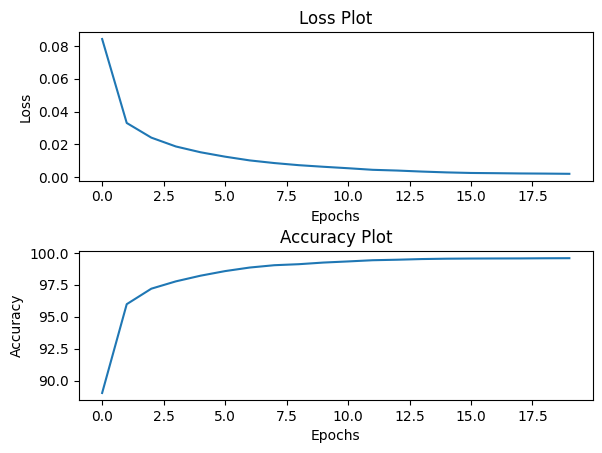

In [ ]:
# WRITE CODE HERE
mlp = MLP(batch=64, lr=1.0, epochs=20)

mlp.train(x_train, y_train, x_valid, y_valid)

mlp.plot()

test_accuracy = mlp.test(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Following are a few predictions of your model on random test images. If your predict() function works correctly, these outputs should replicate the model's test accuracy (lower the accuracy, poorer the predictions, and vice-versa).

<ipython-input-19-66301983e638>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axs[row, col].set_title("Model Prediction: %d, True Label: %d" % (pred, np.argmax(y_test[x])))


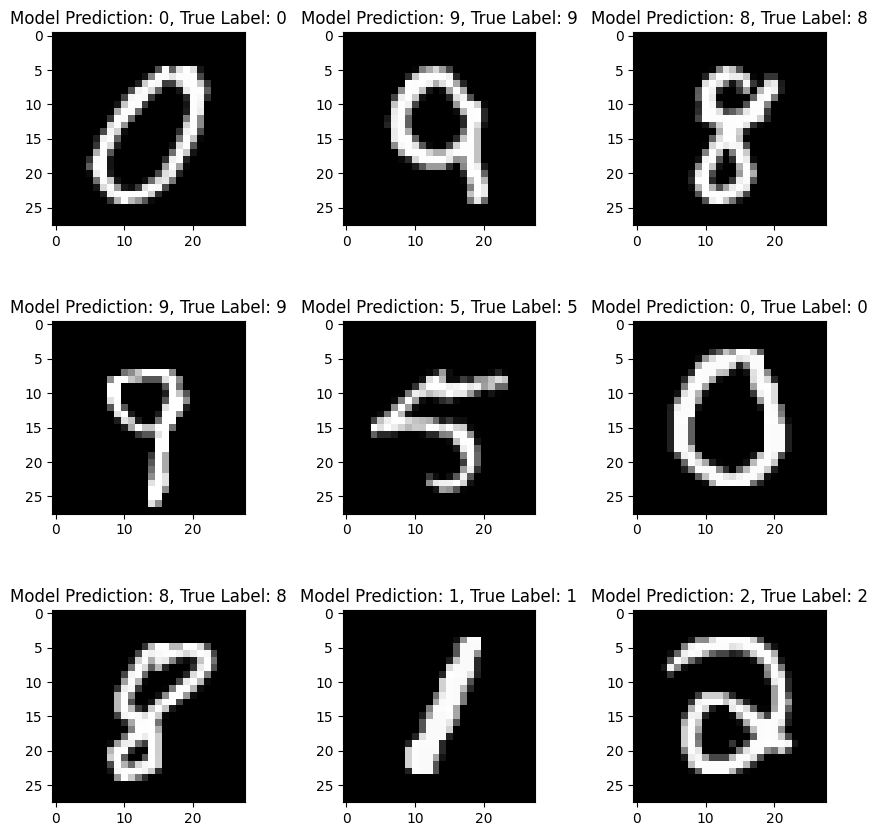

In [ ]:
# DO NOT CHANGE ANYTHING
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(9):
    row = i // 3
    col = i % 3
    x = random.randint(0, len(y_test))
    plot_input = x_test[x].reshape(28, 28)
    pred = mlp.predict(x_test[x].reshape(1, -1))
    axs[row, col].imshow(plot_input, cmap=plt.get_cmap("gray"))
    axs[row, col].set_title("Model Prediction: %d, True Label: %d" % (pred, np.argmax(y_test[x])))

plt.show()


Finally, plot the **Confusion Matrix** of the test labels and your model's predictions on the test images. The confusion matrix gives an idea what kinds of misclassifications your model makes. For example, it can reveal whether your model is systematically misclassifying 4s as 5s.

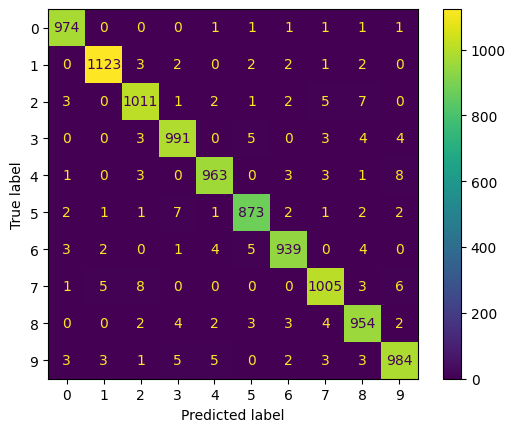

In [ ]:
# DO NOT CHANGE ANYTHING
preds = mlp.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), preds)
cmdisplay = ConfusionMatrixDisplay(cm)
cmdisplay.plot()
plt.show()
